## Questão 1

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

IMAGES_PATH = './images'

In [3]:
ic0 = cv2.imread(os.path.join(IMAGES_PATH, 'ic1.jpg'))
ic1 = cv2.imread(os.path.join(IMAGES_PATH, 'ic2.jpg'))
ic2 = cv2.imread(os.path.join(IMAGES_PATH, 'ic3.jpg'))

p1 = cv2.imread(os.path.join(IMAGES_PATH, 'p1.jpeg'))
p2 = cv2.imread(os.path.join(IMAGES_PATH, 'p2.jpeg'))

m0 = cv2.imread(os.path.join(IMAGES_PATH, 'm3.jpeg'))
m1 = cv2.imread(os.path.join(IMAGES_PATH, 'm1.jpeg'))
m2 = cv2.imread(os.path.join(IMAGES_PATH, 'm2.jpeg'))

kd0 = cv2.imread(os.path.join(IMAGES_PATH, 'kindle3.jpeg'))
kd1 = cv2.imread(os.path.join(IMAGES_PATH, 'kindle1.jpeg'))
kd2 = cv2.imread(os.path.join(IMAGES_PATH, 'kindle2.jpeg'))

lan0 = cv2.imread(os.path.join(IMAGES_PATH, 'l3.jpeg'))
lan1 = cv2.imread(os.path.join(IMAGES_PATH, 'l1.jpeg'))
lan2 = cv2.imread(os.path.join(IMAGES_PATH, 'l2.jpeg'))

cas0 = cv2.imread(os.path.join(IMAGES_PATH, 'cas3.jpeg'))
cas1 = cv2.imread(os.path.join(IMAGES_PATH, 'cas1.jpeg'))
cas2 = cv2.imread(os.path.join(IMAGES_PATH, 'cas2.jpeg'))

tv0 = cv2.imread(os.path.join(IMAGES_PATH, 'tv3.jpeg'))
tv1 = cv2.imread(os.path.join(IMAGES_PATH, 'tv1.jpeg'))
tv2 = cv2.imread(os.path.join(IMAGES_PATH, 'tv2.jpeg'))

In [4]:
def calculate_orb(image1, image2):
    orb = cv2.ORB_create(nfeatures=2000)
    keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(image2, None)
    return keypoints1, descriptors1, keypoints2, descriptors2

In [5]:
def calculate_matches(descriptors1, descriptors2):
    bf = cv2.BFMatcher_create(cv2.NORM_HAMMING)
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)
    return matches

In [6]:
def get_good_matches(matches, dist=0.9):
    good = []
    for m, n in matches:
        if m.distance < dist * n.distance:
            good.append(m)
    
    return good

In [7]:
def warp_images(image1, image2, H):
    rows1, cols1 = image1.shape[:2]
    rows2, cols2 = image2.shape[:2]
    
    list_of_points_1 = np.float32([[0,0], [0, rows1],[cols1, rows1], [cols1, 0]]).reshape(-1, 1, 2)
    temp_points = np.float32([[0,0], [0,rows2], [cols2,rows2], [cols2,0]]).reshape(-1,1,2)

    # When we have established a homography we need to warp perspective
    # Change field of view
    list_of_points_2 = cv2.perspectiveTransform(temp_points, H)

    list_of_points = np.concatenate((list_of_points_1,list_of_points_2), axis=0)

    [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)
    
    translation_dist = [-x_min,-y_min]
    
    H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])

    output_img = cv2.warpPerspective(image2, H_translation.dot(H), (x_max-x_min, y_max-y_min))
    output_img[translation_dist[1]:rows1+translation_dist[1], translation_dist[0]:cols1+translation_dist[0]] = image1

    return output_img

In [8]:
MIN_MATCH_COUNT = 10

def get_final(good, keypoints1, keypoints2, image1, image2):
    if len(good) > MIN_MATCH_COUNT:
        # Convert keypoints to an argument for findHomography
        src_pts = np.float32([ keypoints1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
        dst_pts = np.float32([ keypoints2[m.trainIdx].pt for m in good]).reshape(-1,1,2)

        # Establish a homography
        M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        
        result = warp_images(image2, image1, M)

        return result
    return 0

In [9]:
def stitch_two_images(image1, image2):
    keypoints1, descriptors1, keypoints2, descriptors2 = calculate_orb(image1, image2)
    matches = calculate_matches(descriptors1, descriptors2)
    good = get_good_matches(matches)
    result = get_final(good, keypoints1, keypoints2, image1, image2)
    return result

In [10]:
def show_stitch(res):
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

### 1.1

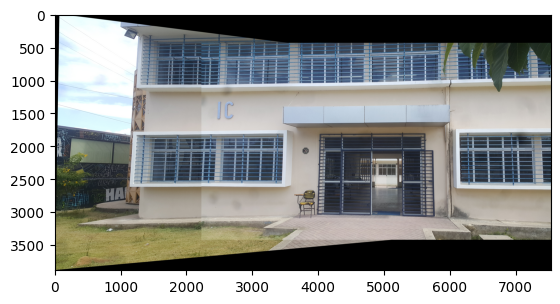

In [11]:
show_stitch(stitch_two_images(ic1, ic2))

### 1.2

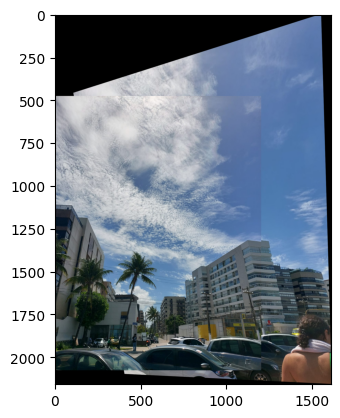

In [12]:
show_stitch(stitch_two_images(p1, p2))

### 1.3

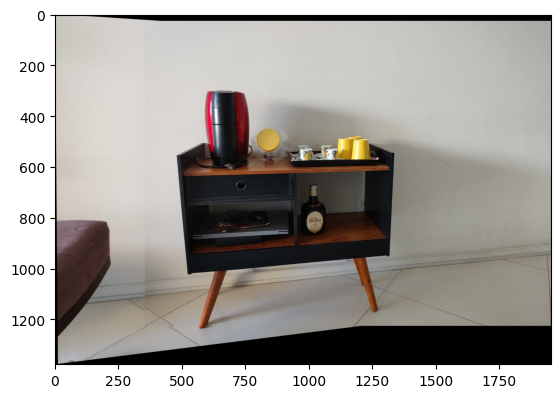

In [13]:
show_stitch(stitch_two_images(m1, m2))

### 1.4

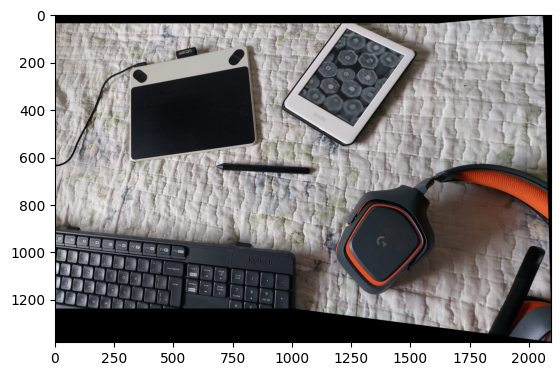

In [14]:
show_stitch(stitch_two_images(kd1, kd2))

### 1.5

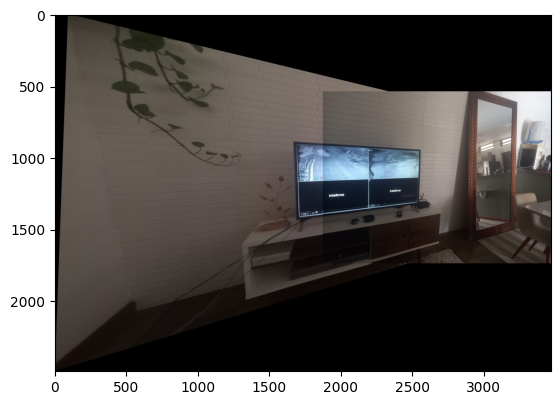

In [21]:
show_stitch(stitch_two_images(tv2, tv0))

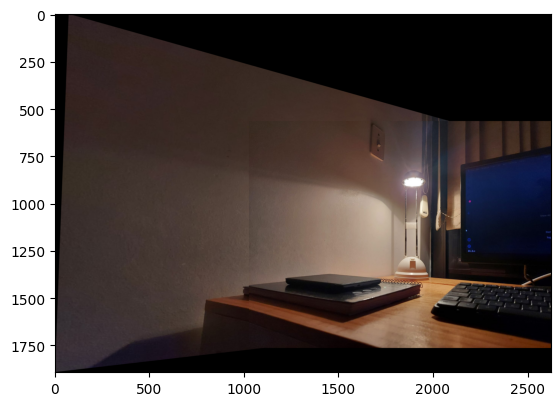

In [15]:
show_stitch(stitch_two_images(lan1, lan2))

## Questão 2

### 2.1

In [36]:
# 2.1

res1 = stitch_two_images(ic2, ic1)
res2 = stitch_two_images(res1, ic0)

res3 = stitch_two_images(ic0, ic1)
res4 = stitch_two_images(res3, ic2)

res5 = stitch_two_images(ic0, ic1)
res6 = stitch_two_images(ic2, res5)

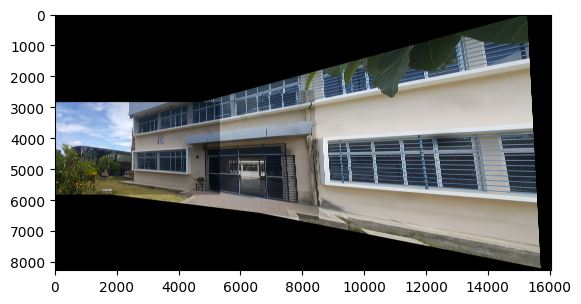

In [37]:
show_stitch(res2)

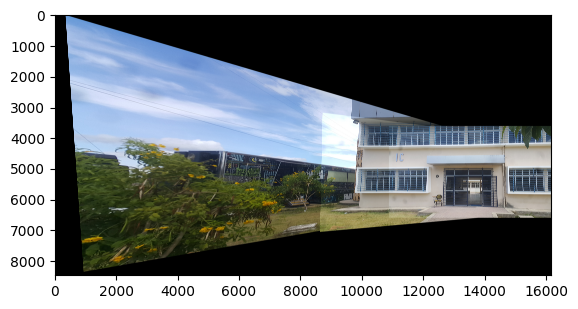

In [38]:
show_stitch(res4)

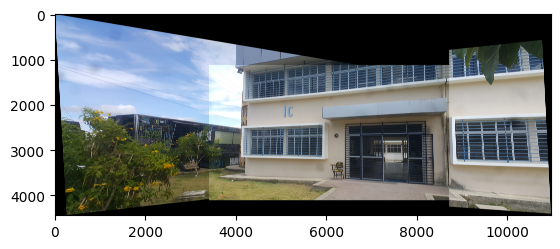

In [39]:
show_stitch(res6)

### 2.2

In [40]:
# 2.2

res1 = stitch_two_images(m2, m1)
res2 = stitch_two_images(res1, m0)

res3 = stitch_two_images(m0, m1)
res4 = stitch_two_images(res3, m2)

res5 = stitch_two_images(m0, m1)
res6 = stitch_two_images(m2, res5)

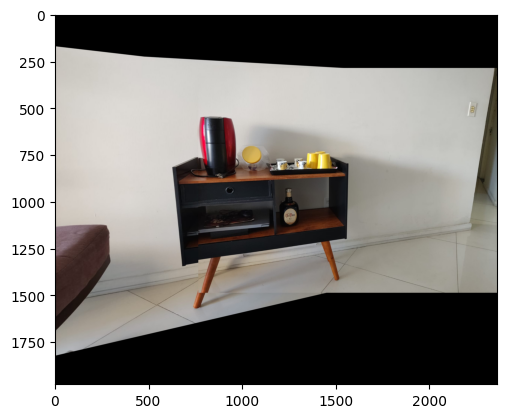

In [41]:
show_stitch(res2)

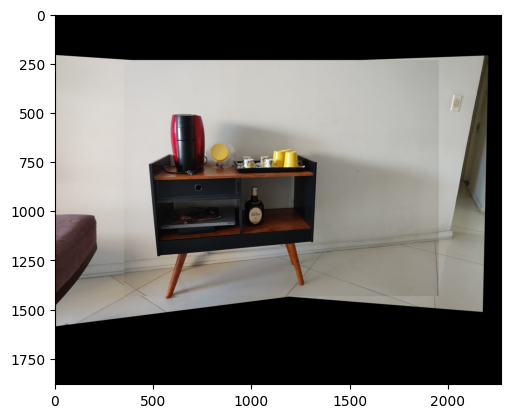

In [42]:
show_stitch(res4)

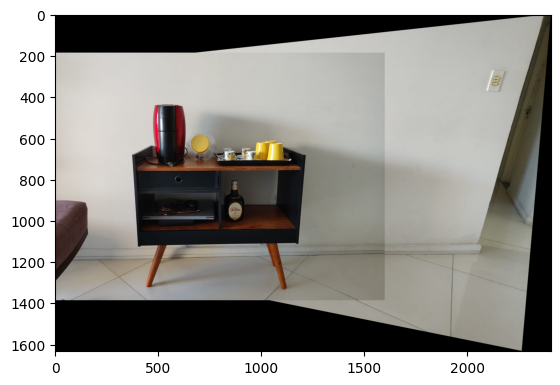

In [43]:
show_stitch(res6)

### 2.3

In [44]:
# 2.3

res1 = stitch_two_images(kd2, kd1)
res2 = stitch_two_images(res1, kd0)

res3 = stitch_two_images(kd0, kd1)
res4 = stitch_two_images(res3, kd2)

res5 = stitch_two_images(kd0, kd1)
res6 = stitch_two_images(kd2, res5)

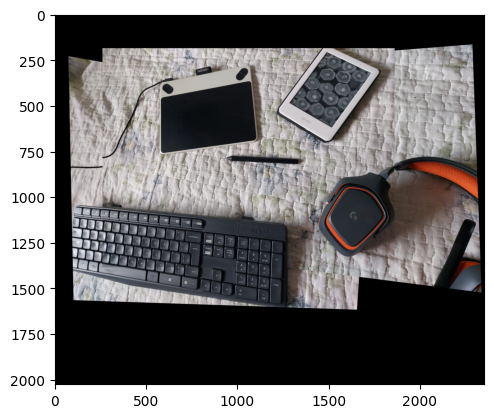

In [45]:
show_stitch(res4)

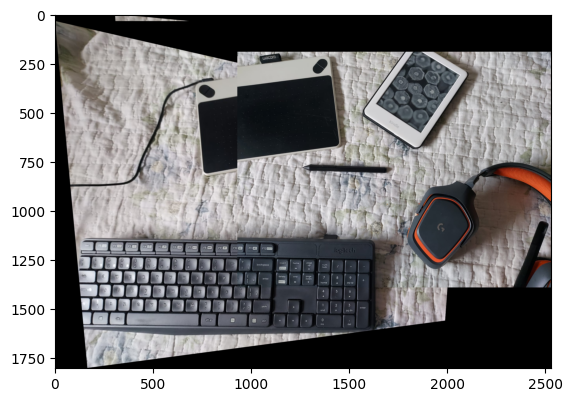

In [46]:
show_stitch(res6)

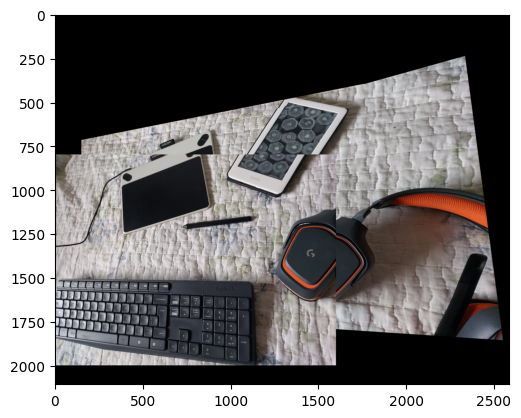

In [47]:
show_stitch(res2)

### 2.4

In [48]:
# 2.4

res1 = stitch_two_images(cas2, cas1)
res2 = stitch_two_images(res1, cas0)

res3 = stitch_two_images(cas0, cas1)
res4 = stitch_two_images(res3, cas2)

res5 = stitch_two_images(cas0, cas1)
res6 = stitch_two_images(cas2, res5)

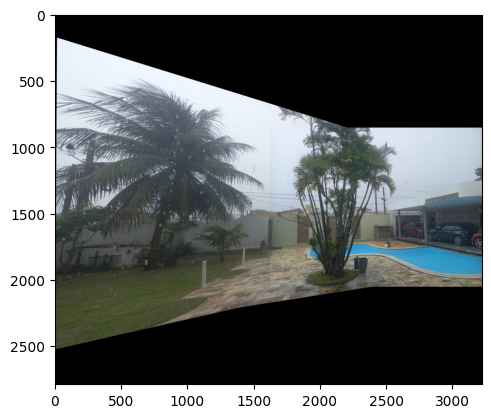

In [49]:
show_stitch(res2)

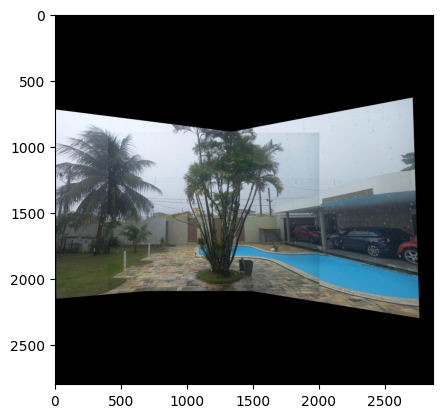

In [50]:
show_stitch(res4)

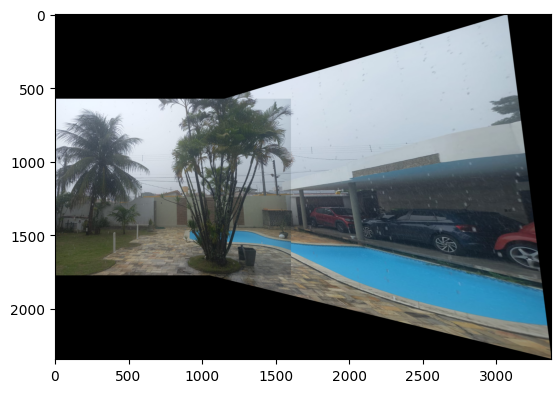

In [51]:
show_stitch(res6)

## Questão 3

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

IMAGES_PATH = './images'

In [ ]:
piscina = cv2.imread(os.path.join(IMAGES_PATH, 'piscina.jpg'))
dp = cv2.imread(os.path.join(IMAGES_PATH, 'aab.jpg'))

In [ ]:
# variables to store coordinates where the second image has to be placed
positions=[] 
positions2=[]
count=0

# Mouse callback function
def draw_circle(event,x,y,flags,param):
    global positions,count
    # If event is Left Button Click then store the coordinate in the lists, positions and positions2
    if event == cv2.EVENT_LBUTTONUP:
        cv2.circle(piscina,(x,y),2,(255,0,0),-1)
        positions.append([x,y])
        if(count!=3):
            positions2.append([x,y])
        elif(count==3):
            positions2.insert(2, [x,y])
        count+=1
        
# Defing a window named 'image'
cv2.namedWindow('image')

cv2.setMouseCallback('image',draw_circle)

while(True):
    cv2.imshow('image',piscina)
    k = cv2.waitKey(20) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

height, width = piscina.shape[:2]
h1,w1 = dp.shape[:2]

pts1=np.float32([[0,0],[w1,0],[0,h1],[w1,h1]])
pts2=np.float32(positions)

h, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC, 5.0)

height, width, channels = piscina.shape
im1Reg = cv2.warpPerspective(dp, h, (width, height))

mask2 = np.zeros(piscina.shape, dtype=np.uint8)

roi_corners2 = np.int32(positions2)

channel_count2 = piscina.shape[2]  
ignore_mask_color2 = (255,)*channel_count2

cv2.fillConvexPoly(mask2, roi_corners2, ignore_mask_color2)

mask2 = cv2.bitwise_not(mask2)
masked_image2 = cv2.bitwise_and(piscina, mask2)

#Using Bitwise or to merge the two images
final = cv2.bitwise_or(im1Reg, masked_image2)
cv2.imwrite('final.jpg',final)

## Questão 4